In [9]:
from pipeline import (univariate_data_analysis, load_data, split_data, optimize_model, #compare_models,
split_univariate_sequence, objective, time_series_forecasting, prepare_data_for_optimization, create_optuna_model)
import pandas as pd

In [10]:
df_filtered, df_info_filtered = load_data()

Info Filtered:
       M4id category  Frequency  Horizon      SP    StartingDate
99623   H38    Other         24       48  Hourly  01-07-15 12:00
99649   H64    Other         24       48  Hourly  01-07-15 12:00
99813  H228    Other         24       48  Hourly  15-05-10 12:00
99860  H275    Other         24       48  Hourly  02-01-10 12:00
99989  H404    Other         24       48  Hourly  06-01-17 12:00

Filtered Data (First Rows):
V1 Step  H404  H275     H64  H228     H38
0    V2  27.0  15.3  2777.0  12.4  3648.0
1    V3  22.0  15.0  2886.0  11.7  3658.0
2    V4  25.0  14.7  2811.0  11.1  3608.0
3    V5  25.0  14.4  2648.0  10.7  3493.0
4    V6  14.0  14.3  2618.0  10.3  3374.0


In [11]:
def index_date(ts):
    starting_date = df_info_filtered[df_info_filtered['M4id'] == ts]['StartingDate'].iloc[0]
    date_range = pd.date_range(start=starting_date, periods=len(df_filtered[ts]), freq='H')
    df_filtered[ts].index = date_range
    return df_filtered[ts].dropna()

ts = index_date('H38')

C:\Users\dosju\AppData\Local\Temp\ipykernel_35588\1067905629.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=starting_date, periods=len(df_filtered[ts]), freq='H')


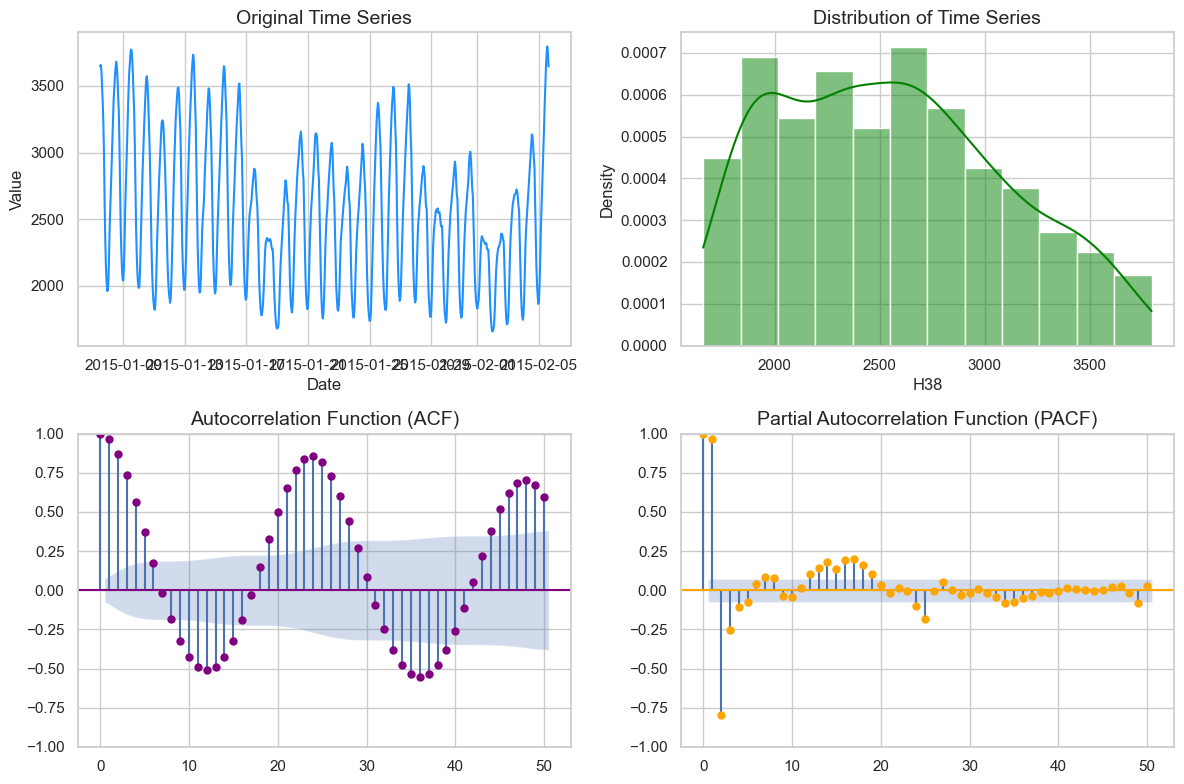

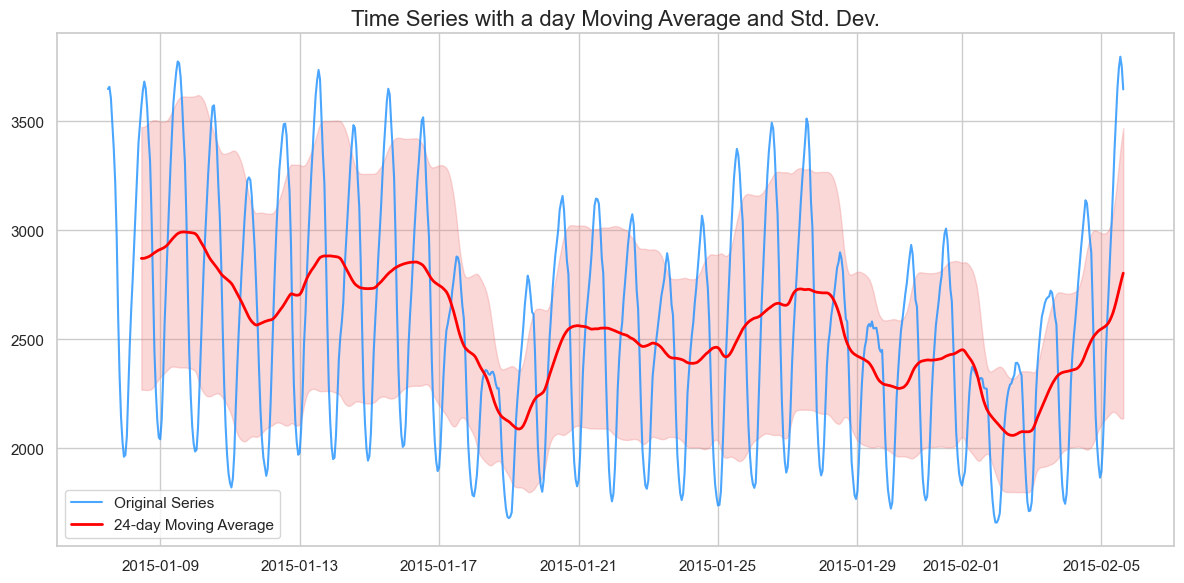

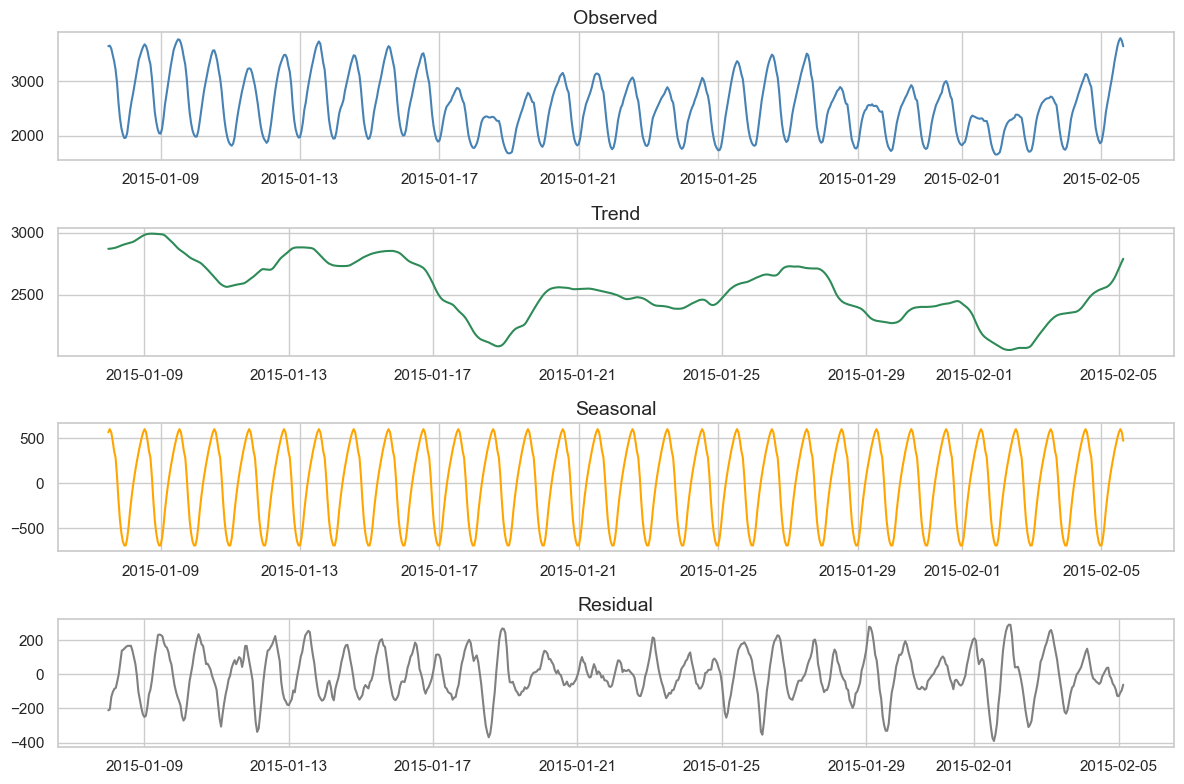

Descriptive Statistics:
count     700.000000
mean     2553.945714
std       534.399763
min      1658.000000
25%      2097.000000
50%      2533.500000
75%      2930.500000
max      3796.000000
Name: H38, dtype: float64

Shapiro-Wilk Test p-value: 1.30933821986155e-11
Interpretation: p < 0.05 suggests the data is not normally distributed

Augmented Dickey-Fuller Test for Stationarity:
ADF Statistic: -1.5167938007072732
p-value: 0.5251879337748004
Interpretation:
p < 0.05: Reject null hypothesis (Series is stationary)
p >= 0.05: Fail to reject null hypothesis (Series might be non-stationary)


In [12]:
univariate_data_analysis(ts)

Train: 441, Validation: 105, Test: 106


C:\Users\dosju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\dosju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\dosju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\s

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MLP Model 1 MAE: 39.4025908679497
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MLP Model 2 MAE: 118.52236566310974
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MLP Model 3 MAE: 28.404122701505337
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN Model 1 MAE: 32.698038240758386
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
CNN Model 2 MAE: 95.02577172256096
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
CNN Model 3 MAE: 131.34444669397865
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
LSTM Model 1 MAE: 43.10056063024009
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
LSTM Model 2 MAE: 51.743978360804114
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
LSTM Model 3 MAE: 76.84570461366233
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
CNN-LSTM Model 1 MAE: 37.968891422923015
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
CNN-LSTM Model 2 MAE: 96.85127072217988
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
CNN-LSTM Model 3 MAE: 43.011148592320886

Best Model: MLP Model 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

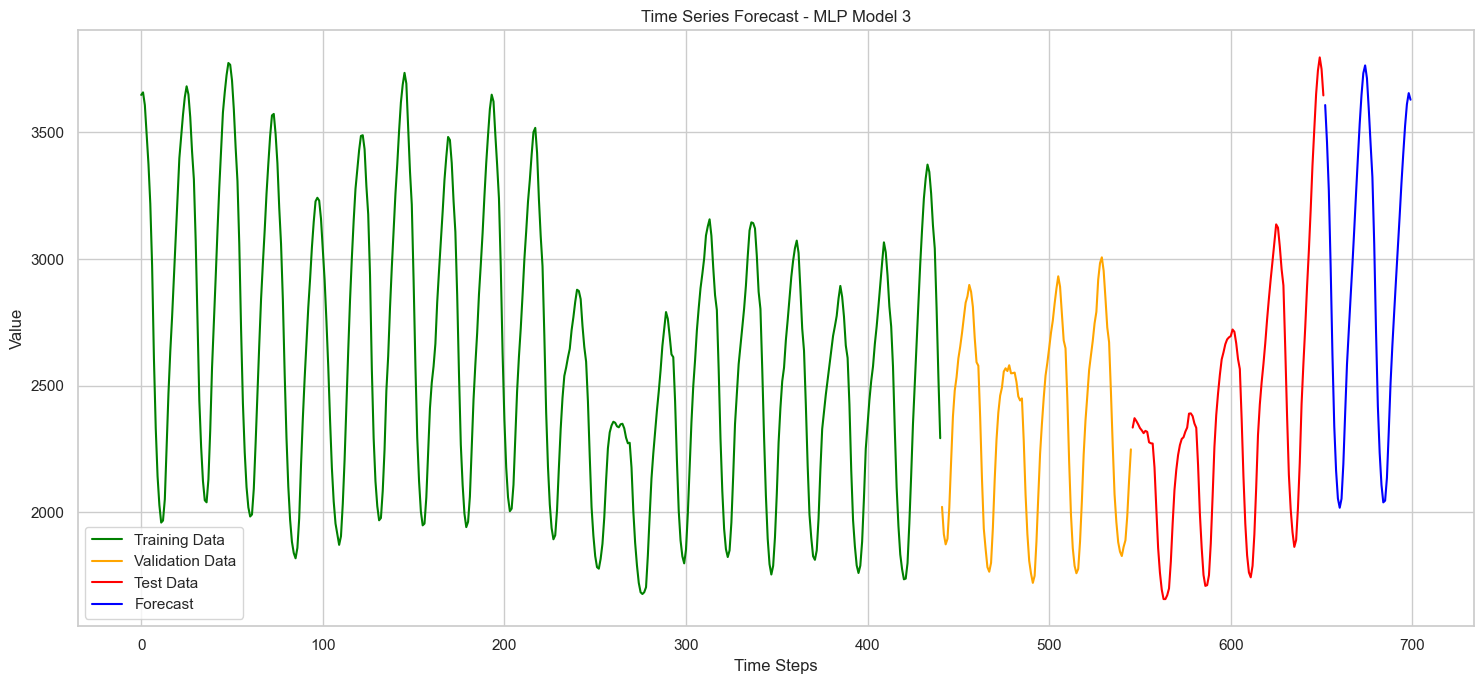

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


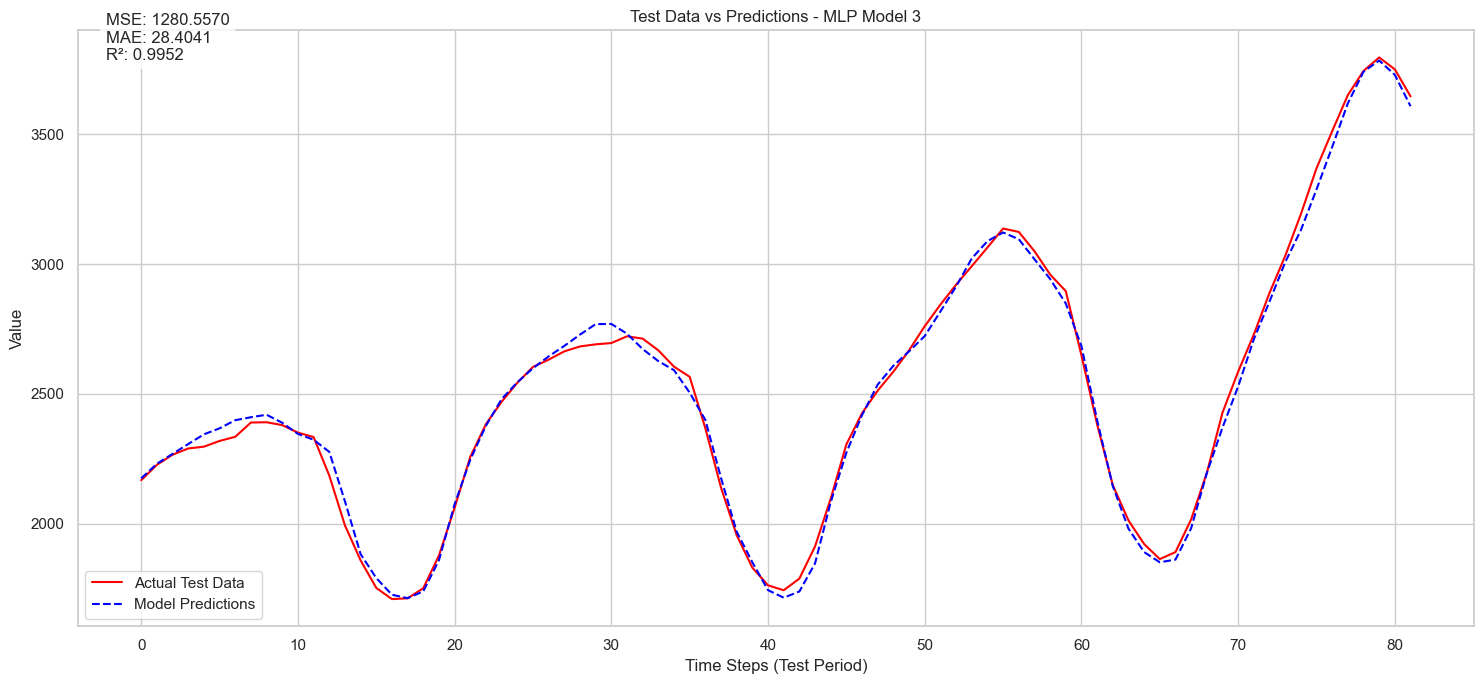


Model Performance Comparison:
      Model Type  Mean Absolute Error
     MLP Model 3            28.404123
     CNN Model 1            32.698038
CNN-LSTM Model 1            37.968891
     MLP Model 1            39.402591
CNN-LSTM Model 3            43.011149
    LSTM Model 1            43.100561
    LSTM Model 2            51.743978
    LSTM Model 3            76.845705
     CNN Model 2            95.025772
CNN-LSTM Model 2            96.851271
     MLP Model 2           118.522366
     CNN Model 3           131.344447


In [13]:
train_data, val_data, test_data = split_data(ts)
best_model = time_series_forecasting(train_data, val_data, test_data)

In [14]:
best_model['best_model'].summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 256)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,997 (582.02 KB)

 Trainable params: 49,665 (194.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,332 (388.02 KB)

[I 2025-03-28 17:53:36,021] A new study created in memory with name: no-name-d10d35ea-2f20-43fb-8636-d8c40b6eb925


c:\Users\dosju\Downloads\Examen2NL\pipeline.py:662: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
C:\Users\dosju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-03-28 17:53:38,921] Trial 0 finished with value: 0.15828917920589447 and parameters: {'optimizer': 'rmsprop', 'learning_rate': 0.009398498370426106, 'activation': 'tanh', 'n_layers': 5, 'neurons_0': 151, 'neurons_1': 124, 'dropout_1'

Best MLP Model Optimization Results:
  Number of trials: 100
  Best trial value (MAE): 0.012945874594151974
  Best hyperparameters:
    optimizer: adam
    learning_rate: 0.0011149625698190341
    activation: relu
    n_layers: 2
    neurons_0: 142
    neurons_1: 85
    dropout_1: 0.0009729009091204728
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

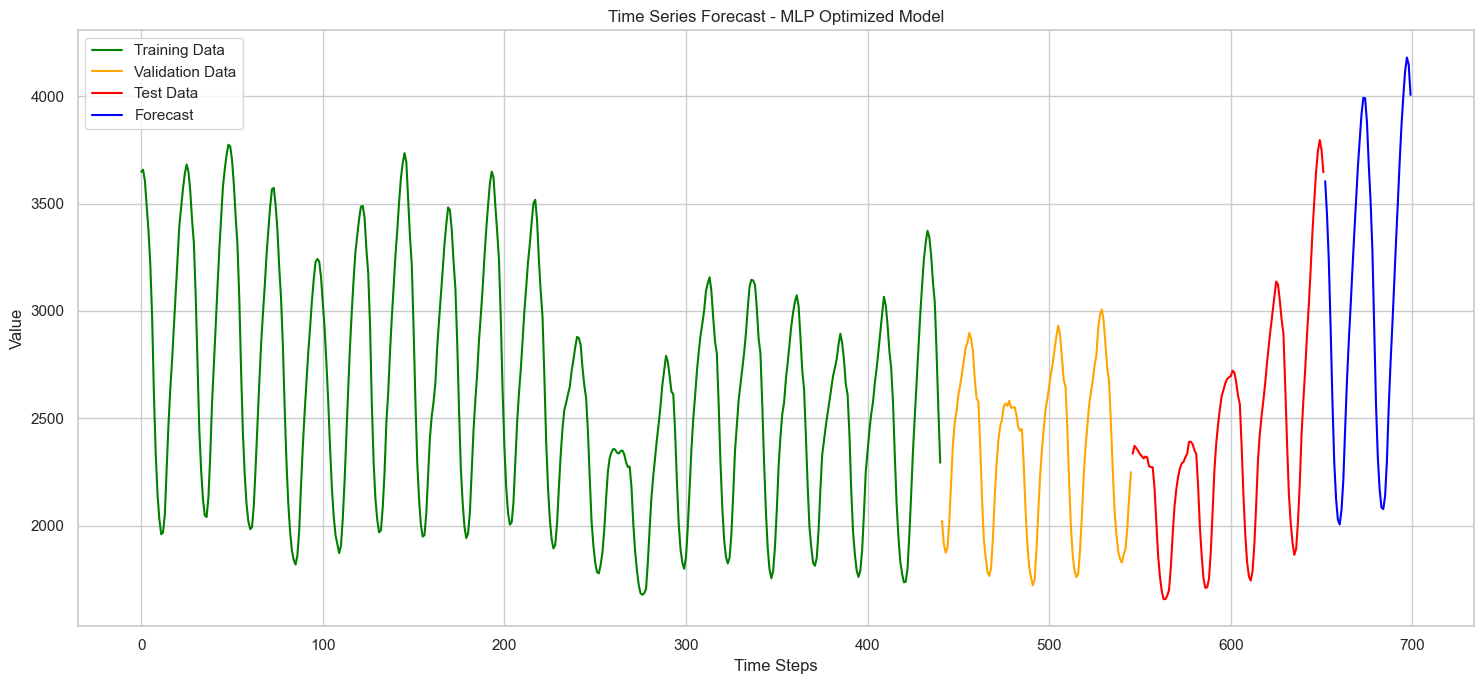


Test Data Prediction Analysis:


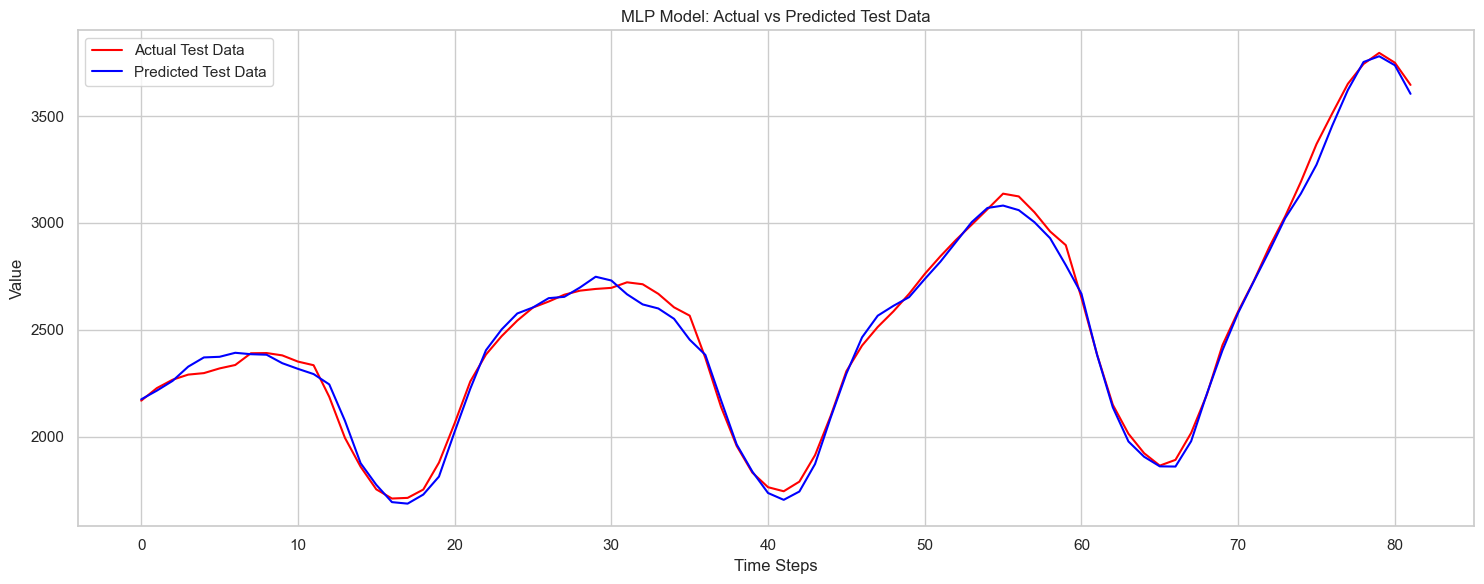


Model Performance Metrics:
Mean Absolute Error (MAE): 32.01835371808307
Mean Squared Error (MSE): 1634.7444833199063


In [15]:
result = optimize_model(train_data, val_data, test_data, n_steps=24, model_type='mlp', n_trials=100)
best_model = result['best_model']
best_params = result['best_params']
scaler = result['scaler']